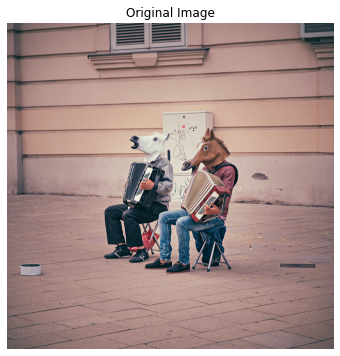

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


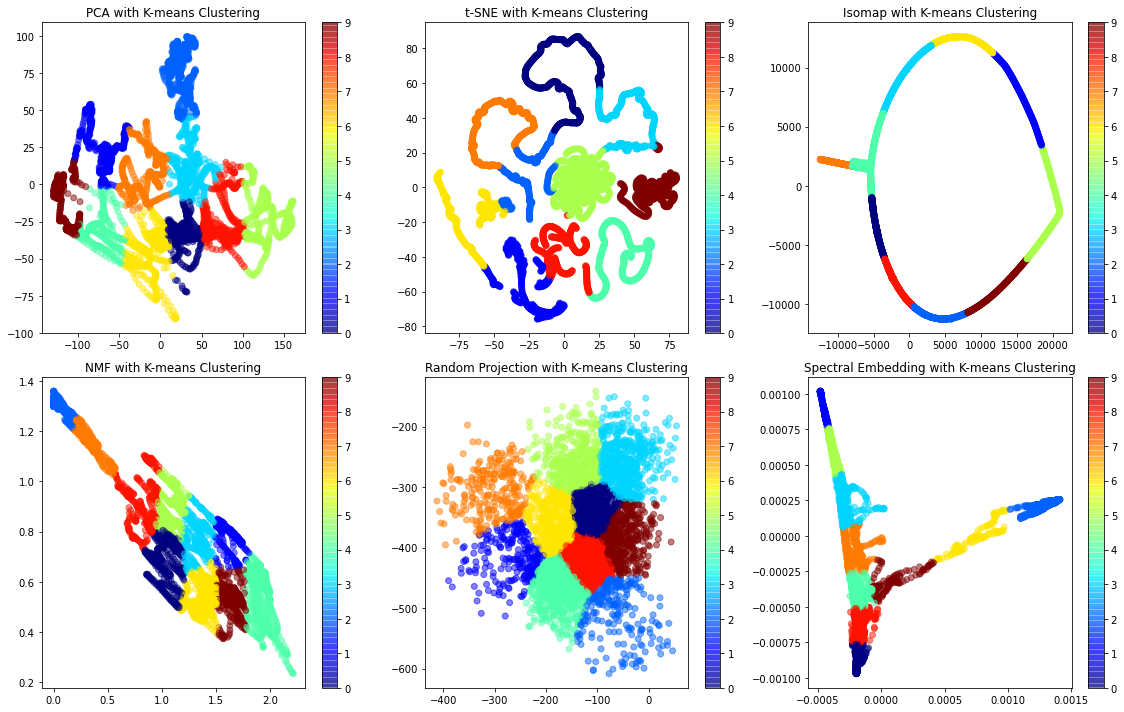

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the image data (replace 'image_path' with the path to your image file)
image = plt.imread('./img.jpg')
# Plot the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Convert the image into a 2D array
image_array = np.reshape(image, (image.shape[0], -1))

# Standardize the image data with non-negative values
scaler = StandardScaler(with_mean=False)
image_array_std = scaler.fit_transform(image_array)

# Perform dimensionality reduction using various algorithms
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_array_std)

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(image_array_std)

isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(image_array_std)

nmf = NMF(n_components=2)
nmf_result = nmf.fit_transform(image_array_std)

random_projection = GaussianRandomProjection(n_components=2)
rp_result = random_projection.fit_transform(image_array_std)

spectral_embedding = SpectralEmbedding(n_components=2)
se_result = spectral_embedding.fit_transform(image_array_std)

# Apply K-means clustering on the reduced-dimensional representations
kmeans_pca = KMeans(n_clusters=10)
labels_pca = kmeans_pca.fit_predict(pca_result)

kmeans_tsne = KMeans(n_clusters=10)
labels_tsne = kmeans_tsne.fit_predict(tsne_result)

kmeans_isomap = KMeans(n_clusters=10)
labels_isomap = kmeans_isomap.fit_predict(isomap_result)

kmeans_nmf = KMeans(n_clusters=10)
labels_nmf = kmeans_nmf.fit_predict(nmf_result)

kmeans_rp = KMeans(n_clusters=10)
labels_rp = kmeans_rp.fit_predict(rp_result)

kmeans_se = KMeans(n_clusters=10)
labels_se = kmeans_se.fit_predict(se_result)

# Plot the reduced-dimensional representations with cluster labels
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_pca, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('PCA with K-means Clustering')

plt.subplot(2, 3, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_tsne, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('t-SNE with K-means Clustering')

plt.subplot(2, 3, 3)
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c=labels_isomap, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('Isomap with K-means Clustering')

plt.subplot(2, 3, 4)
plt.scatter(nmf_result[:, 0], nmf_result[:, 1], c=labels_nmf, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('NMF with K-means Clustering')

plt.subplot(2, 3, 5)
plt.scatter(rp_result[:, 0], rp_result[:, 1], c=labels_rp, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('Random Projection with K-means Clustering')

plt.subplot(2, 3, 6)
plt.scatter(se_result[:, 0], se_result[:, 1], c=labels_se, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title('Spectral Embedding with K-means Clustering')

plt.tight_layout()
plt.show()